# Oasis Infobyte (Data Science Internship)
## Task 1
## Iris Classification
### By Saugata Panja

## 1. Loading dataset

In [1]:
# importing pandas to read the dataset
import pandas as pd
#Reading the Iris dataset through pandas
data=pd.read_csv("Iris.csv")
df=pd.DataFrame(data)

#Printing the dataset
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 3. Dataset analysis and Cleaning

In [2]:
# Checking shape of dataset
print(df.shape)
# Printing coulums' name
print(df.columns)
# Description of the dataset
print(df.describe())
# Info about the whole dataset
print(df.info())
# Checking for null values
print(df.isnull().sum())

# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  ---

There are missing values and duplicate rows in the dataset.

## 3. Dropping Unnecessary Column
Here 'Id' coulmn is unnecessary as it has no influence on the target variable i.e. 'Species'. So we wil be removing it.

In [3]:
# Dropping the Id column
df=df.drop(["Id"], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 4. Data Visualization

#### i. Univariate Analysis

0.3149109566369728
Axes(0.125,0.11;0.775x0.77)


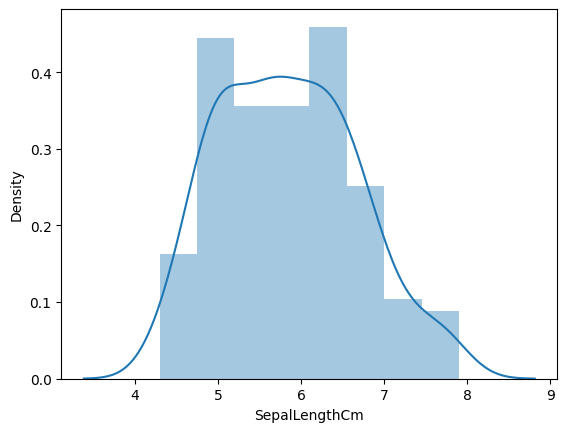

In [4]:
import warnings
warnings.filterwarnings("ignore")
# Importing seaborn for data visualization
import seaborn as sns
print(df["SepalLengthCm"].skew(axis=0))
print(sns.distplot(df["SepalLengthCm"]))


0.3340526621720866
Axes(0.125,0.11;0.775x0.77)


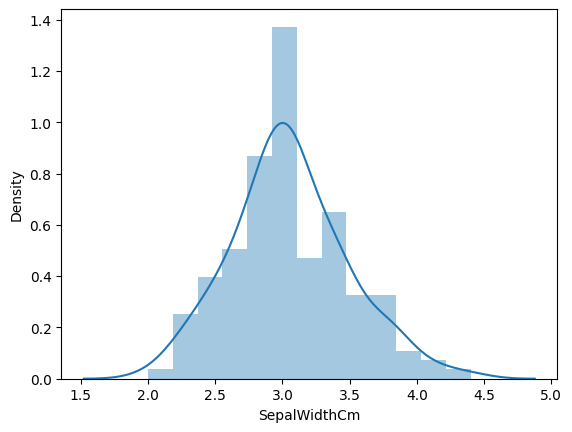

In [5]:
print(df["SepalWidthCm"].skew(axis=0))
print(sns.distplot(df["SepalWidthCm"]))

-0.27446425247378287
Axes(0.125,0.11;0.775x0.77)


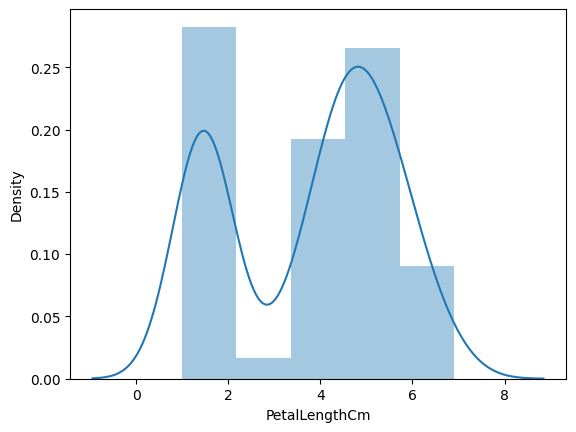

In [6]:
print(df["PetalLengthCm"].skew(axis=0))
print(sns.distplot(df["PetalLengthCm"]))

-0.10499656214412734
Axes(0.125,0.11;0.775x0.77)


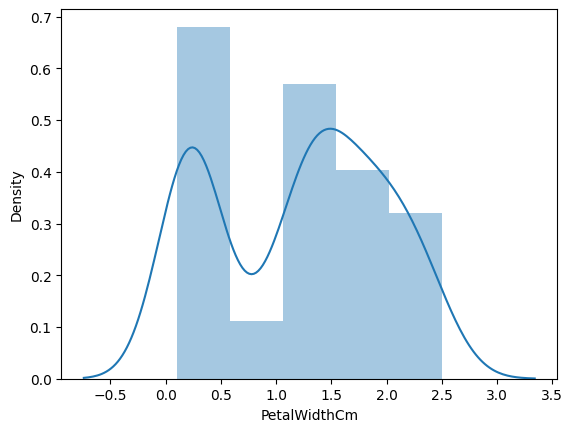

In [7]:
print(df["PetalWidthCm"].skew(axis=0))
print(sns.distplot(df["PetalWidthCm"]))

#### From the univarite analysis, we can say only SepalLengthCm and SepalWidthCm are normally distributed. Others Features are not normally distributed.

### ii. Bivariate Analysis

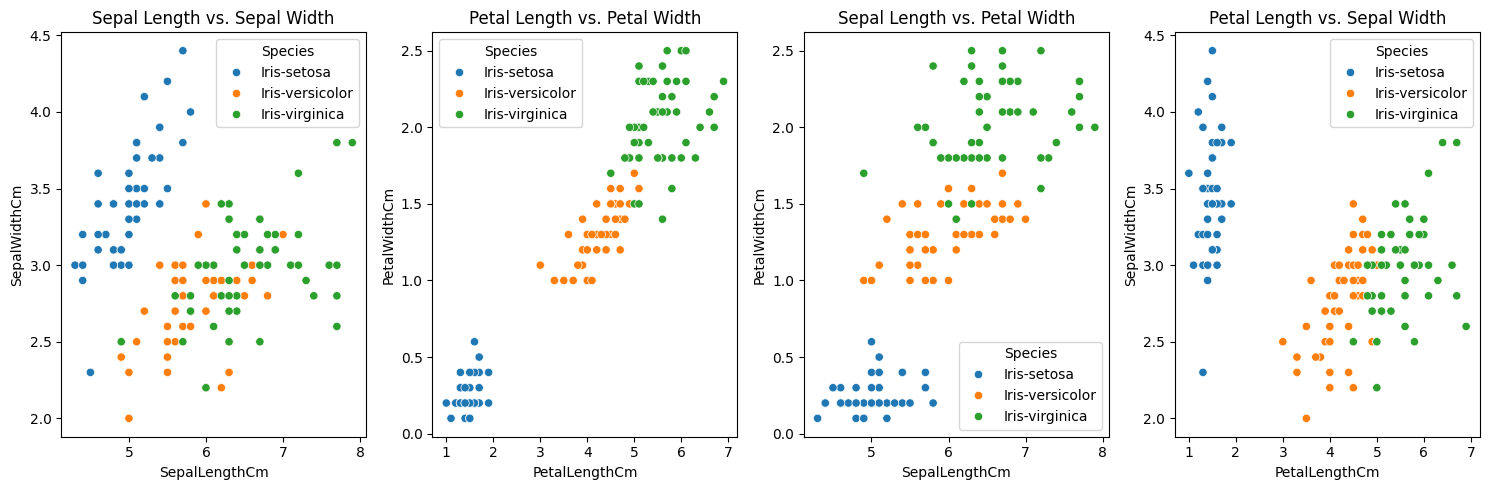

In [8]:
import matplotlib.pyplot as plt
# Create subplots
plt.figure(figsize=(15, 5))

# Sepal Length vs. Sepal Width
plt.subplot(1, 4, 1)
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df)
plt.title("Sepal Length vs. Sepal Width")

# Petal Length vs. Petal Width
plt.subplot(1, 4, 2)
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df)
plt.title("Petal Length vs. Petal Width")

# Sepal Length vs. Petal Width
plt.subplot(1, 4, 3)
sns.scatterplot(x="SepalLengthCm", y="PetalWidthCm", hue="Species", data=df)
plt.title("Sepal Length vs. Petal Width")

# Petal Length vs. Sepal Width
plt.subplot(1, 4, 4)
sns.scatterplot(x="PetalLengthCm", y="SepalWidthCm", hue="Species", data=df)
plt.title("Petal Length vs. Sepal Width")

plt.tight_layout()
plt.show()


Sepal Length vs. Sepal Width:Setosa tends to have shorter sepal length and wider sepal width, making it distinguishable from the other two species.Versicolor and Virginica have more overlap in terms of sepal length and width, but Virginica typically has longer sepals.

Petal Length vs. Petal Width:Setosa has smaller petals (both in length and width) compared to Versicolor and Virginica.
Versicolor and Virginica show some overlap, but Petal Length and Petal Width are generally higher for Virginica.

Sepal Length vs. Petal Width:Sepal Length and Petal Width show separation between Setosa and the other two species.
Versicolor and Virginica have similar sepal lengths, but Virginica typically has wider petals.

Petal Length vs. Sepal Width:Petal Length vs. Sepal Width shows good separation between Setosa and the other species.
Versicolor and Virginica have more overlap, but Virginica tends to have longer petals and wider sepals.
These observations help in understanding how different species of iris flowers differ with respect to these bivariate combinations. You can see that Setosa is typically distinct in most of these combinations, while Versicolor and Virginica have some overlap in their characteristics.

### iii. Multivariate Analysis

<Axes: >

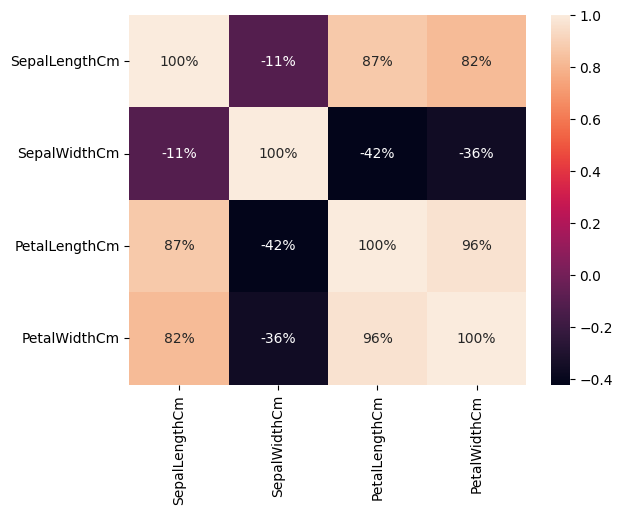

In [9]:
import seaborn as sns
# Checking Heatmap for all variable
data=df.drop(['Species'], axis=1)
sns.heatmap(data.corr(),annot=True,fmt='.0%')

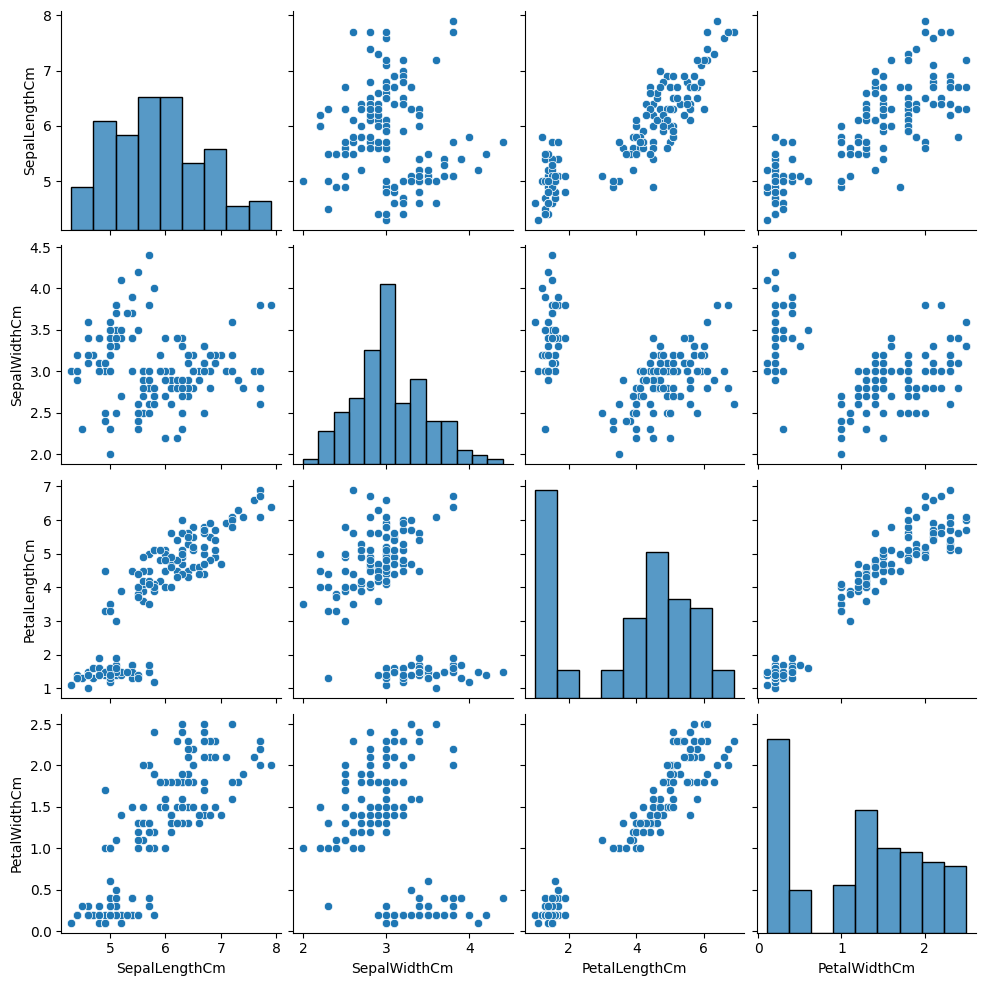

In [10]:
sns.pairplot(df)

### iv. Checking Outliers

<Axes: >

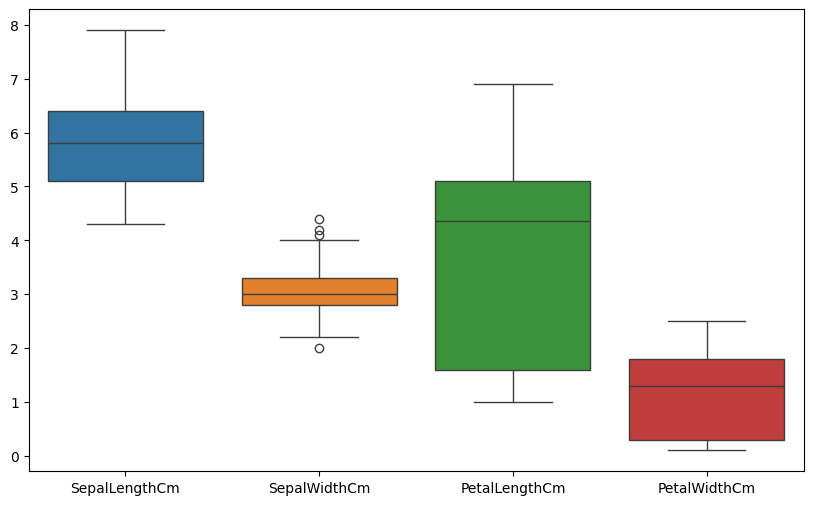

In [11]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot for the entire DataFrame
sns.boxplot(data=df)

Sepal Width has outliers. We need to remove those datapoints. Here we will be using Z-score method.

In [12]:
# Removing outliers
from scipy import stats
z_scores = stats.zscore(df['SepalWidthCm'])
threshold = 2  
# We can adjust this threshold as needed

outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove the outliers from the dataset
df= df[~outliers]
print(df)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[145 rows x 5 columns]


<Axes: >

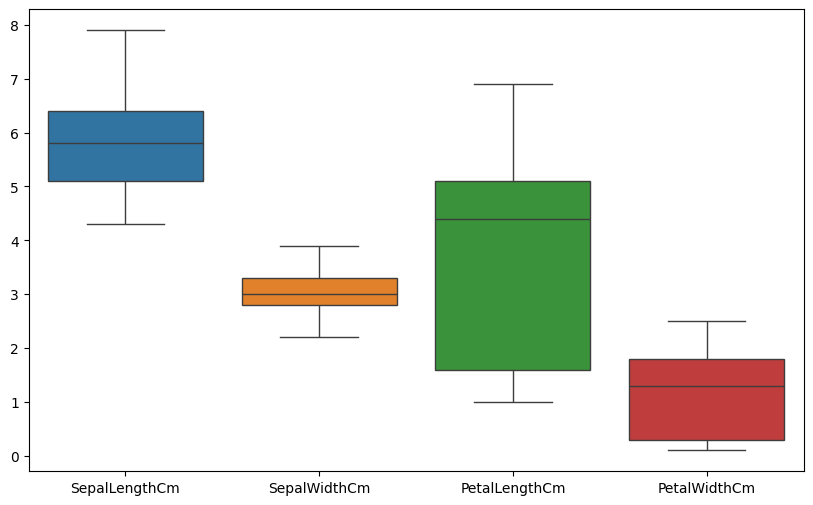

In [13]:
# Checking for outliers again to verify.
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot for the entire DataFrame
sns.boxplot(data=df)

We can see those outliers were removed successfully.

## 5. Label Encoding
As Species(Categorical) column in the dataset is 'string' type, we need perform an encoding technique. Here we will be using label encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
# converting Species
le = LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 6. Splitting dataset into trainng set and testing set

In [15]:
from sklearn.model_selection import train_test_split
X= df.drop(["Species"], axis=1)
Y= df["Species"]

print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[145 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 145, dtype: int32


## 7. Trainning different models and checking accuracy of each model

In [16]:
# Importing required modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Random Forest
forest  = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)
forest.fit(X_train,Y_train)
  
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
  
#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)

# Naive Bayes
Gau = GaussianNB()
Gau.fit(X_train,Y_train)

# Support Vector Machine
V = SVC()
V.fit(X_train,Y_train)
  

#Print the  model accuracy on the training data
print("[1] Random Forest Training Accuracy :", forest.score(X_train,Y_train))
print("[2] K-Nearest Neighbors Training Accuracy :", knn.score(X_train,Y_train))
print("[3] Linear Discriminant Analysis Training Accuracy :", lda.score(X_train,Y_train))
print("[4] Gaussian Naive Bayes Training Accuracy :", Gau.score(X_train,Y_train))
print("[5] Support Vector Machine Training Accuracy :", V.score(X_train,Y_train))

[1] Random Forest Training Accuracy : 1.0
[2] K-Nearest Neighbors Training Accuracy : 0.975609756097561
[3] Linear Discriminant Analysis Training Accuracy : 0.983739837398374
[4] Gaussian Naive Bayes Training Accuracy : 0.967479674796748
[5] Support Vector Machine Training Accuracy : 0.983739837398374


#### Here we can see Random forest classifier is giving the best accuracy.

In [18]:
#Predicted value for X_test
Y_pred = forest.predict(X_test)
Y_pred

array([1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0])

In [19]:
from sklearn.metrics import accuracy_score, classification_report
classification_rep = classification_report(Y_test, Y_pred)
print('Classification Report of Random Forest:')
print(classification_rep)

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      0.86      0.80         7
           2       0.86      0.75      0.80         8

    accuracy                           0.86        22
   macro avg       0.87      0.87      0.87        22
weighted avg       0.87      0.86      0.86        22



In [20]:
p=forest.predict([[1.2,2,2.1,0.7]])
if p[0]==0:
    print("Iris setosa")
elif p[0]==1:
    print("Iris versicolor")    
else:
    print("Iris Virginica")    

Iris setosa
